In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as up
from stl import mesh
from mpl_toolkits import mplot3d
import os
import scipy.constants as const

#import ParticlePlottingFunctions
import ParticlePlottingFunctions as ppf
%load_ext autoreload 
%autoreload 2

In [24]:
file1 = "100UCN_fill_SCM_track.root"

#get our two different data folders already for ease
Nend = up.open(file1+":neutronend")
Nsnapshot = up.open(file1+":neutronsnapshot")
Ntrack = up.open(file1+":neutrontrack")

In [140]:
# print(Ntrack.keys())

particleTrack_all = Ntrack.arrays(['particle', 'polarisation', 't', 'x', 'y', 'z', 'vx', 'vy', 'vz', 
                    'H', 'E', 'Bx', 'dBxdx', 'dBxdy', 'dBxdz', 'By', 'dBydx', 'dBydy', 
                                   'dBydz', 'Bz', 'dBzdx', 'dBzdy', 'dBzdz'], "(particle==10) & (x > 0)", library="np")

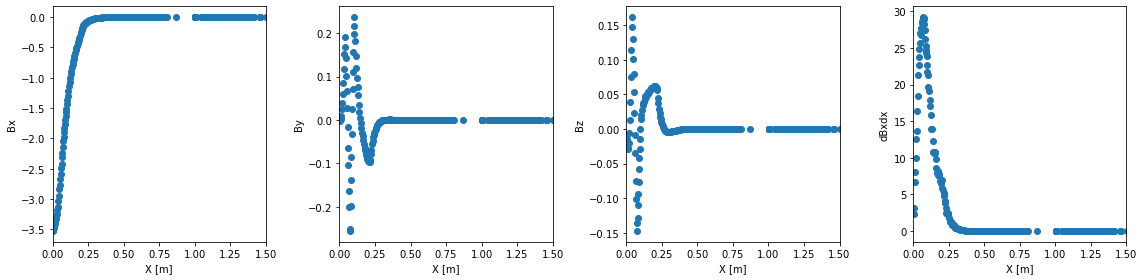

In [141]:
## Look at B vs positions

fig, axs = plt.subplots(1, 4, figsize=(16,4))

axs[0].plot(particleTrack_all['x'], particleTrack_all['Bx'], ls="", marker="o")
axs[0].set_ylabel('Bx')
axs[0].set_xlabel('X [m]')
axs[0].set_xlim(0, 1.5)

axs[1].plot(particleTrack_all['x'], particleTrack_all['By'], ls="", marker="o")
axs[1].set_ylabel('By')
axs[1].set_xlabel('X [m]')
axs[1].set_xlim(0, 1.5)

axs[2].plot(particleTrack_all['x'], particleTrack_all['Bz'], ls="", marker="o")
axs[2].set_ylabel('Bz')
axs[2].set_xlabel('X [m]')
axs[2].set_xlim(0, 1.5)

axs[3].plot(particleTrack_all['x'], particleTrack_all['dBxdx'], ls="", marker="o")
axs[3].set_ylabel('dBxdx')
axs[3].set_xlabel('X [m]')
axs[3].set_xlim(0, 1.5)

plt.tight_layout()

plt.show()

In [121]:
gamma_n = const.physical_constants['neutron gyromag. ratio'][0] #s^-1 T^-1, negative
'''
The adiabatic parameter
B:
dbdx:
v_n:
'''
def K_equ1(B, dbdx, v_n):
    if dbdx == 0:
        k = -1
    else:
        k = gamma_n*B**2 / (v_n*dbdx)
    return k

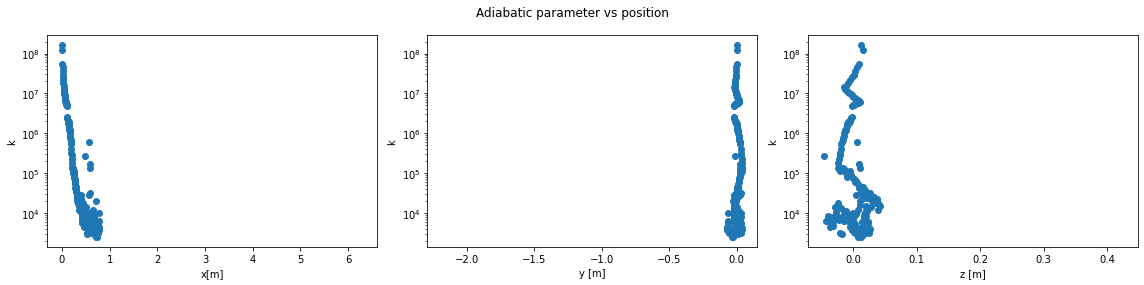

In [142]:
x = particleTrack_all['x'].astype(float)
y = particleTrack_all['y'].astype(float)
z = particleTrack_all['z'].astype(float)
times = particleTrack_all['t'].astype(float)

#adiabatic parameter for each position 
k = [K_equ1(particleTrack_all['Bx'][i], particleTrack_all['dBxdx'][i], 
            particleTrack_all['vx'][i]) for i in range(len(particleTrack_all['Bx']))]
# print(k)
fig, axs = plt.subplots(1, 3, figsize=(16,4))

axs[0].semilogy(x, k, ls="", marker="o")
axs[0].set_ylabel('k')
axs[0].set_xlabel('x[m]')

axs[1].semilogy(y, k, ls="", marker="o")
axs[1].set_ylabel('k')
axs[1].set_xlabel('y [m]')

axs[2].semilogy(z, k, ls="", marker="o")
axs[2].set_ylabel('k')
axs[2].set_xlabel('z [m]')

plt.suptitle("Adiabatic parameter vs position")
plt.tight_layout()
plt.show()

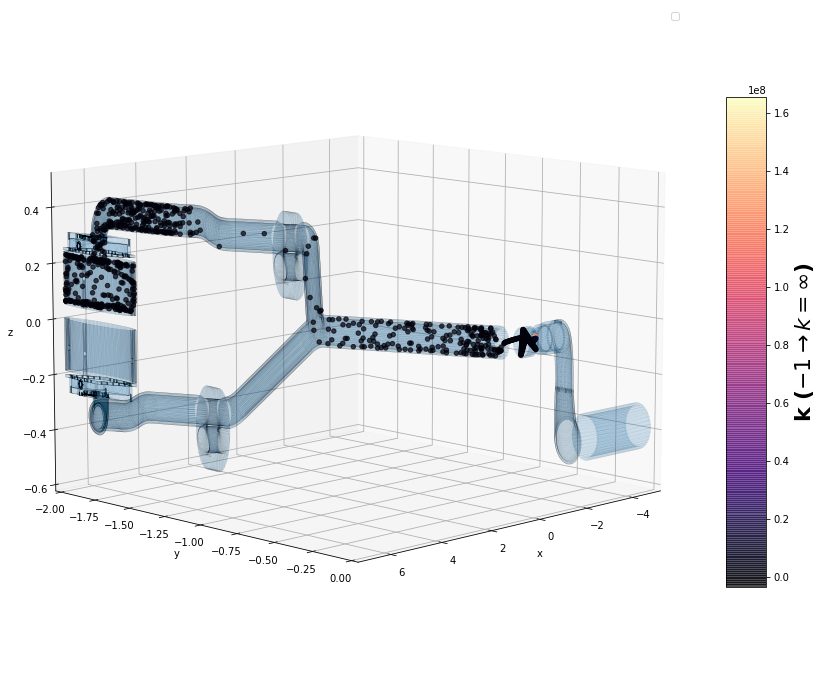

In [143]:
%matplotlib inline 
#lets you move the graph around within jupyter lab
# %matplotlib widget
   
figVals = ppf.plot3D_varColor(x, y, z, k, times, label="All", startPlot=True, ls="", 
                              endPlot=False, size=(15,15))
fig, axis, p = figVals

axis.view_init(elev=10., azim=45)
# axis.view_init(elev=0., azim=90)

#loads all the file I have in this folder as STLs
STLpath = 'STLsToGraph'
stl_array = os.listdir(STLpath)

for STLfile in stl_array:
    ppf.graphSTL(STLpath+'/'+STLfile, axis)
    
#removes repeated legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axis.legend(by_label.values(), by_label.keys())

cb = fig.colorbar(p, ax=axis, shrink=0.6, aspect=20*0.6)
cb.set_label(label="k ($-1 \\rightarrow k=\\infty$)", size=22, weight='bold')
# cb.ax.tick_params(labelsize=20)
# plt.tight_layout()
plt.show()